In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
total_data = pd.concat([train_data, test_data]).reset_index(drop=True)

In [2]:

##### preview the data #####
print(total_data.info())
for column in total_data.columns:
    if total_data[column].isnull().any() == True and column != 'Survived':
        print('[' + column + ']' + ' has missed data')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None
[Age] has missed data
[Fare] has missed data
[Cabin] has missed data
[Embarked] has missed data


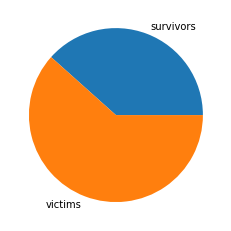

In [3]:
##### data analysis #####

# the percentage of survivor
survivors_count = train_data['Survived'].sum()
victims_count = len(train_data['PassengerId']) - survivors_count
plt.pie([survivors_count, victims_count], labels=['survivors', 'victims'])
plt.show()

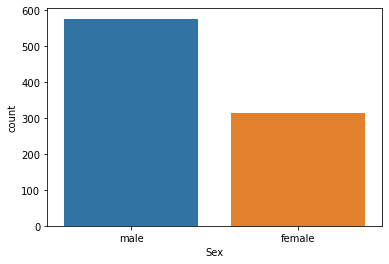

In [4]:
# gender
sns.countplot(data=train_data, x='Sex')
plt.show()

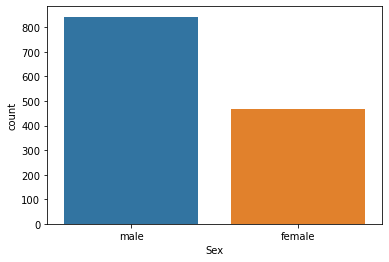

In [5]:
# gender of total data
sns.countplot(data=total_data, x='Sex')
plt.show()

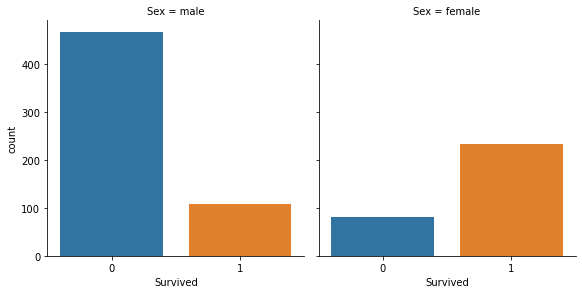

In [6]:
sns.catplot(data=train_data, x='Survived', col='Sex', kind='count', height=4)
plt.show()

In [7]:
sex_total = train_data['Sex'].value_counts()

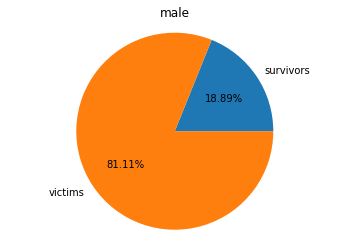

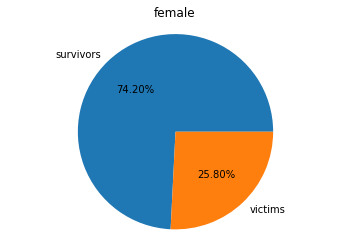

In [8]:
# survived rate by gender
for sex in sex_total.index:
    sex_count = sex_total[sex]
    sex_survived = len(train_data[(train_data['Sex'] == sex) & (train_data['Survived'] == 1)])
    plt.pie([sex_survived, (sex_count - sex_survived)], labels=['survivors', 'victims'], autopct='%1.2f%%')
    plt.title(sex)
    plt.axis('equal')
    plt.show()

In [9]:
# pclass
print(total_data['Pclass'].value_counts())

3    709
1    323
2    277
Name: Pclass, dtype: int64


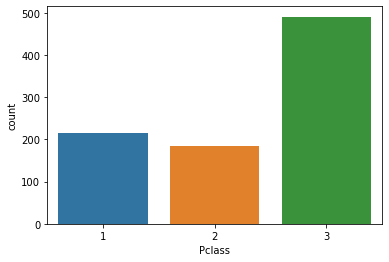

In [10]:
# train data
def pclass_count_ploting(data):
    sns.countplot(x=data)
    plt.show()
pclass_count_ploting(train_data['Pclass'])

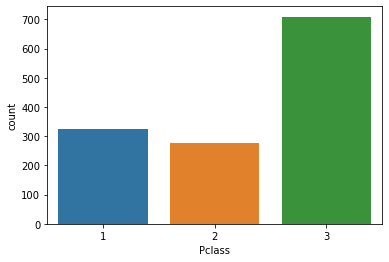

In [11]:
# total data
pclass_count_ploting(total_data['Pclass'])

In [12]:
# survival rate by Pclass
pclass_sp = train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean().unstack()

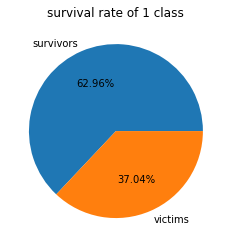

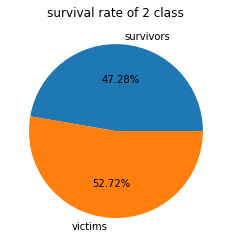

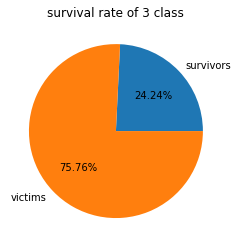

In [13]:
for index in pclass_sp.index:
    num = pclass_sp[index]
    plt.pie([num, 1-num],labels=['survivors','victims'],autopct='%1.2f%%')
    plt.title('survival rate of {} class'.format(index[1]))
    plt.show()

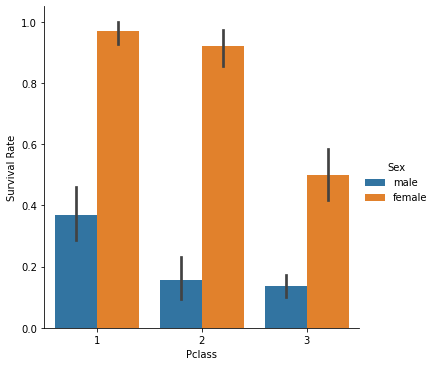

In [14]:
# survival rate by pclass and gender
sns.catplot(data=train_data, x='Pclass', y='Survived', hue='Sex', kind='bar')
plt.ylabel('Survival Rate')
plt.show()

In [15]:
# gender ratio of Pclass (train data)
def pclass_gender_ratio_ploting(data):
    pclass_gender = data[['Sex', 'Pclass']].groupby('Pclass')['Sex'].value_counts(normalize=True)
    pclass_gender.unstack().plot(kind='bar', stacked=True, rot=True)
    plt.ylabel('gender ratio')
    plt.show()

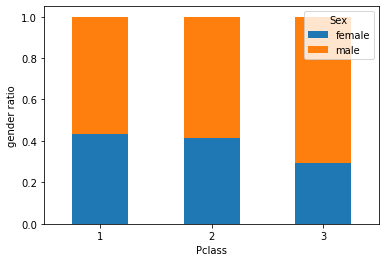

In [16]:
pclass_gender_ratio_ploting(train_data)

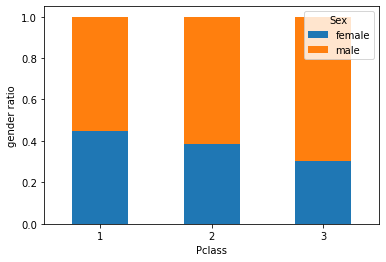

In [17]:
# gender ratio of Pclass (total data)
pclass_gender_ratio_ploting(total_data)

In [18]:
##### Embark #####
# total data
def embarked_counting(data):
    print(data['Embarked'].value_counts(dropna=False))
embarked_counting(train_data)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


In [19]:
# train data
embarked_counting(train_data)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


In [20]:
embarked_survived_rate = train_data[['Survived', 'Embarked']].groupby(['Embarked'], as_index=False).mean()

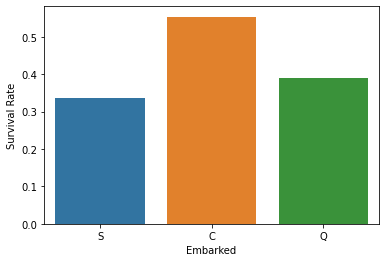

In [21]:
sns.barplot(data=embarked_survived_rate, x='Embarked', y='Survived', order=['S','C','Q'])
plt.ylabel('Survival Rate')
plt.show()

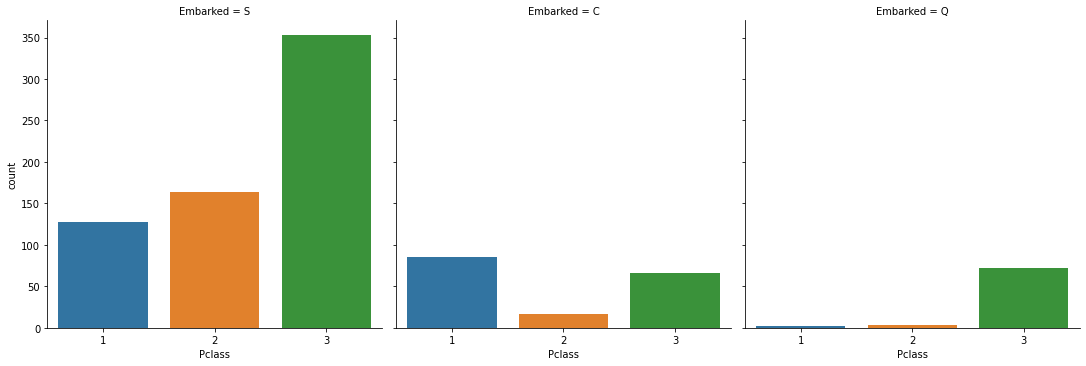

In [22]:
# Pclass & Embarked
# train
sns.catplot(x='Pclass', data=train_data, col='Embarked', kind='count')
plt.show()

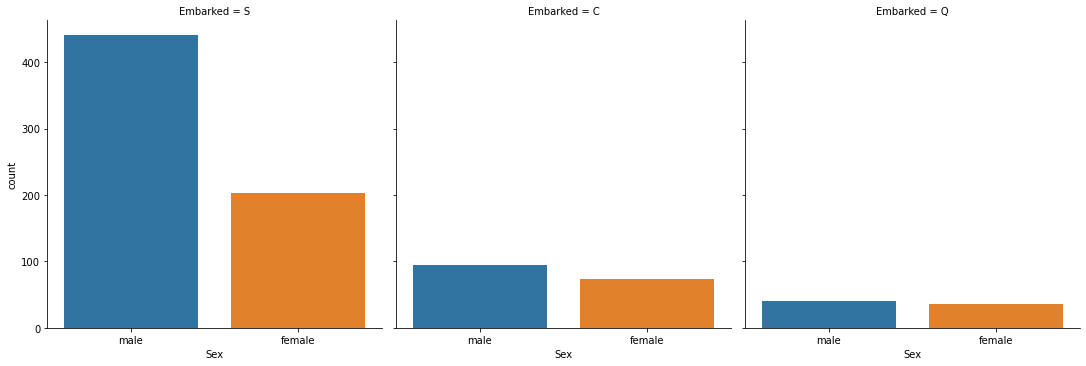

In [23]:
# Pclass & Gender
sns.catplot(data=train_data, x='Sex', col='Embarked', kind='count')
plt.show()

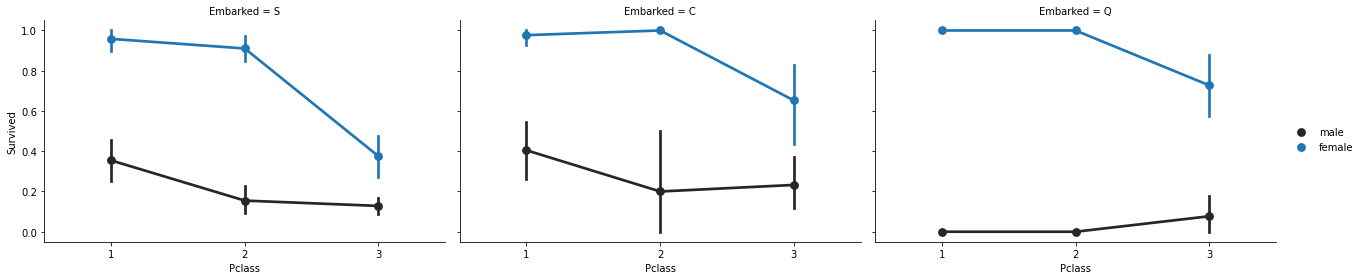

In [24]:
# Pclass & Gender & Embarked (exceptionally for C and Q)
pge_grid = sns.FacetGrid(data=train_data, col='Embarked', height=4,aspect=1.5)
pge_grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',order=[1,2,3],hue_order=['male', 'female'])
pge_grid.add_legend()
plt.show()

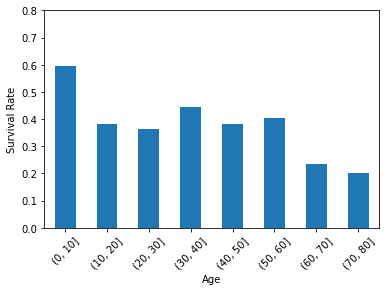

In [25]:
# age survived rate
age_survived_data = train_data[['Age', 'Survived']].dropna()
age_survived_bin = [i*10 for i in range(0,9)]
age_survivalrate_plot = age_survived_data.groupby(pd.cut(age_survived_data['Age'], bins=age_survived_bin))['Survived'].mean().plot(kind='bar', rot=45)
plt.ylabel('Survival Rate')
plt.ylim(0,0.8)
plt.show()

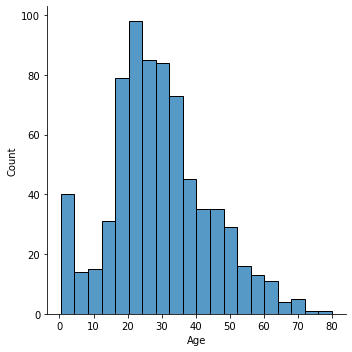

In [26]:
# age distribution of train data
sns.displot(data=train_data, x='Age', kind='hist')
plt.show()

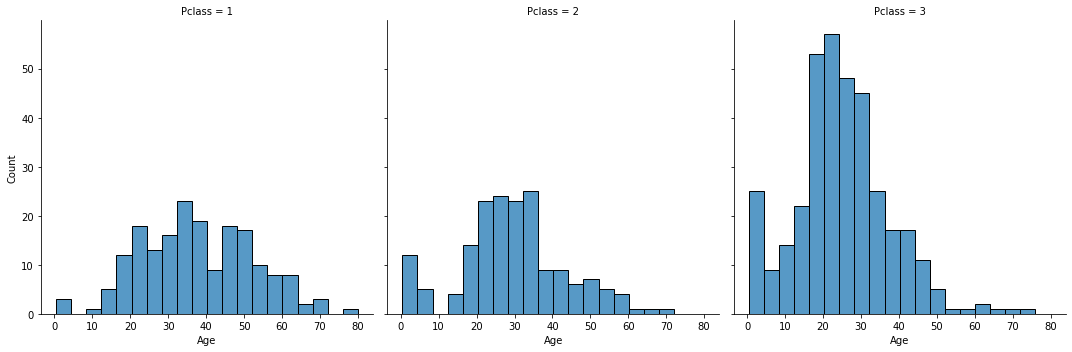

In [27]:
# Age distribution of each Pclass (train)
sns.displot(data=train_data, x='Age', kind='hist', col='Pclass')
plt.show()

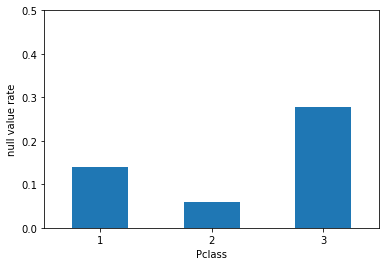

In [28]:
# missing age distribute (train)
age_pclass_distribute = train_data[['Age', 'Pclass']]
age_pclass_null_total = age_pclass_distribute[age_pclass_distribute['Age'].isnull()].groupby('Pclass').size()
age_pclass_total = age_pclass_distribute.groupby('Pclass').size()
age_pclass_null_rate = age_pclass_null_total / age_pclass_total
age_pclass_null_rate_plot = age_pclass_null_rate.plot(kind='bar', rot=0)
plt.ylabel('null value rate')
plt.ylim(0, 0.5)
plt.show()

In [29]:
# age survival rate of pclass 1 and 2
pclass1_2_survived_data = train_data[['Age', 'Survived', 'Pclass']]
pclass1_2_survived_data = pclass1_2_survived_data[pclass1_2_survived_data['Pclass'] != 3].dropna()

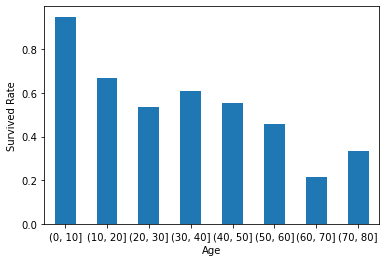

In [30]:
# age survival rate of pclass 1 and 2 (p1 and p2 together)
p1_2_survival = pclass1_2_survived_data.drop(columns=['Pclass'])
p1_2_survival_plot = p1_2_survival.groupby(pd.cut(p1_2_survival['Age'], bins=age_survived_bin))['Survived'].mean().plot(kind='bar',rot=0)
plt.ylabel('Survived Rate')
plt.show()

In [31]:
# age survival rate of pclass 1 and 2 (p1 and p2 seperate)
survival_without3 = pclass1_2_survived_data[(pclass1_2_survived_data['Pclass'] != 3)]

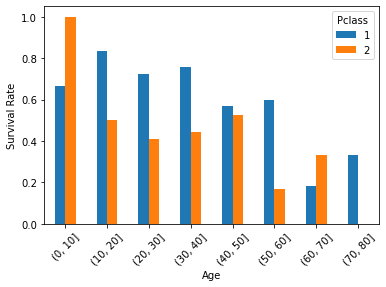

In [32]:
survival_without3_plot = survival_without3.groupby(['Pclass', pd.cut(survival_without3['Age'], bins=age_survived_bin)])['Survived'].mean().unstack(level=0)
survival_without3_plot.plot(kind='bar',rot=45)
plt.ylabel('Survival Rate')
plt.show()

In [33]:
# cabin data of train data has only 204 data
print(len(train_data['Cabin'].dropna()))

204


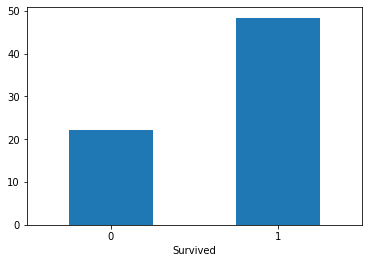

In [34]:
# fare
train_data[['Fare', 'Survived']].groupby('Survived')['Fare'].mean().plot(kind='bar', rot=0)
plt.show()

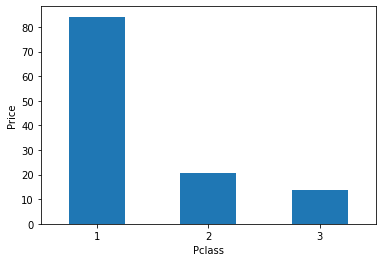

In [35]:
# fare of each Pclass (train)
def pclass_fare_ploting(data):
    data[['Fare', 'Pclass']].groupby('Pclass')['Fare'].mean().plot(kind='bar', rot=0)
    plt.ylabel('Price')
    plt.show()
pclass_fare_ploting(train_data)

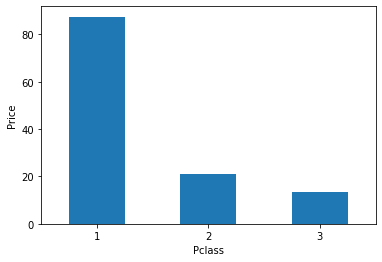

In [36]:
# fare of each Pclass (total)
pclass_fare_ploting(total_data)

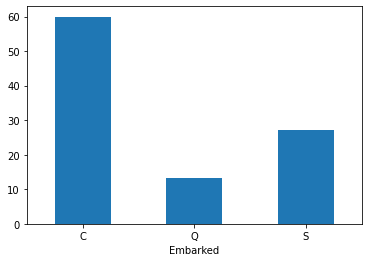

In [37]:
# fare by embarked (train)
def embarked_fare_ploting(data):
    data[['Fare','Embarked']].groupby('Embarked')['Fare'].mean().plot(kind='bar', rot=0)
    plt.show()
embarked_fare_ploting(train_data)

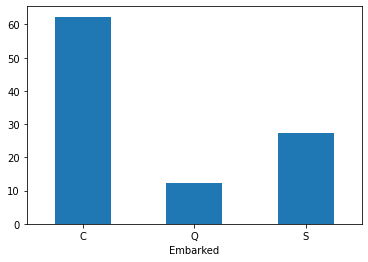

In [38]:
# fare by embarked (total)
embarked_fare_ploting(total_data)

In [39]:
# create Title column
total_data['Title'] = total_data.Name.str.split(',', expand=True)[1].str.split('.', expand=True)[0]

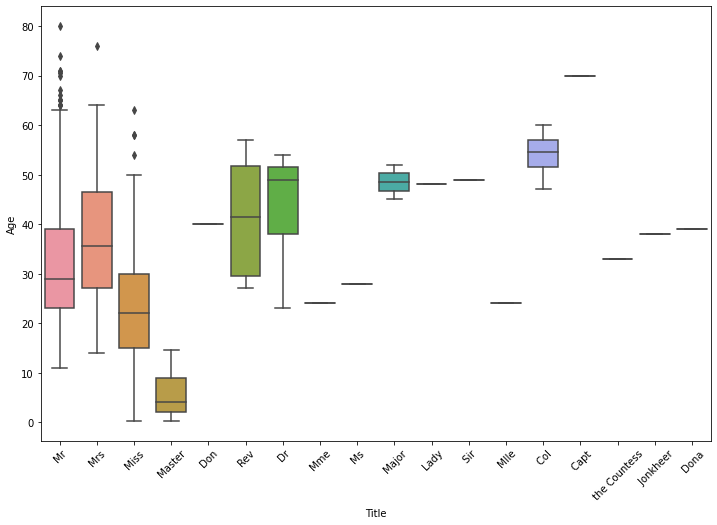

In [40]:
title_age_data = total_data[['Title', 'Age', 'Sex']].dropna()
plt.figure(figsize=(12, 8))
sns.boxplot(data=title_age_data, x='Title', y='Age')
plt.xticks(rotation=45)
plt.show()

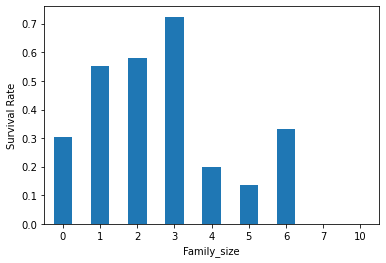

In [41]:
# family
def ploting_family():
    family_data = total_data[['SibSp', 'Parch', 'Survived']]
    family_data = family_data.assign(Family_size = family_data.SibSp + family_data.Parch)
    family_data.groupby('Family_size')['Survived'].mean().plot(kind='bar', rot=0)
    plt.ylabel('Survival Rate')
    plt.show()
ploting_family()

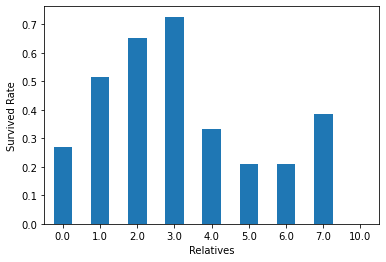

In [42]:
def connected_ticket_count():
    connected_count = total_data.groupby('Ticket', as_index=False).size()
    for index in connected_count.index:
        ticket = connected_count.iloc[index]['Ticket']
        counts = connected_count.iloc[index]['size'] - 1
        total_data.loc[total_data.Ticket == str(ticket), 'Relatives'] = counts
    total_data.groupby('Relatives')['Survived'].mean().plot(kind='bar', rot=0)
    plt.ylabel('Survived Rate')
    plt.show()
connected_ticket_count()

In [43]:
def family_count():
    for index in total_data.index:
        family = total_data.iloc[index]['SibSp'] + total_data.iloc[index]['Parch']
        total_data.loc[total_data.index==index, 'Family_count'] = family

family_count()

def connected():
    for index in total_data.index:
        if total_data.iloc[index]['Relatives'] == 0:
            total_data.loc[index, 'Connected'] = total_data.iloc[index]['Family_count']
        else:
            total_data.loc[index, 'Connected'] = total_data.iloc[index]['Relatives']
    
connected()

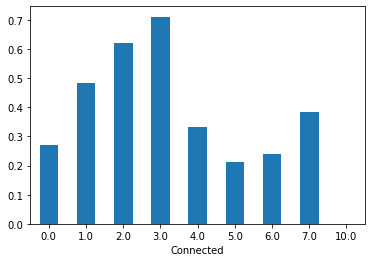

In [48]:
total_data.groupby('Connected')['Survived'].mean().plot(kind='bar', rot=0)
plt.show()